In [1]:
import numpy as np
import pandas as pd

In [2]:
placement_df = pd.read_csv('placement.csv')
placement_df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


Steps
1. preprocessing +EDA + Feature Selection
2. Extract input and output columns
3. Scale the value
4. Train test split
5. Train the model
6. Evalute the model or model selection
7. Deploy the model

<h3>1. preprocessing +EDA + Feature Selection


In [3]:
placement_df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
placement_df = placement_df.iloc[:,1:]

In [5]:
placement_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
placement_df.shape

(100, 3)

In [8]:
import matplotlib.pyplot as plt

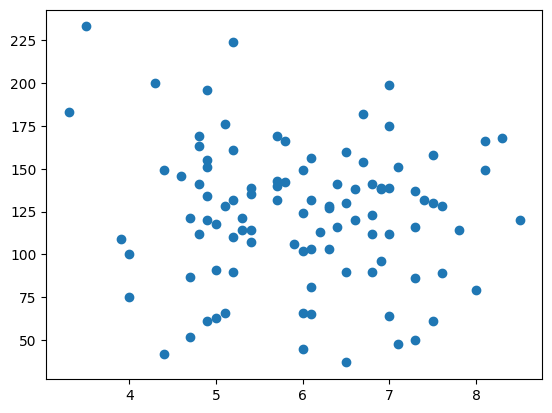

In [9]:
plt.scatter(placement_df['cgpa'], placement_df['iq'])

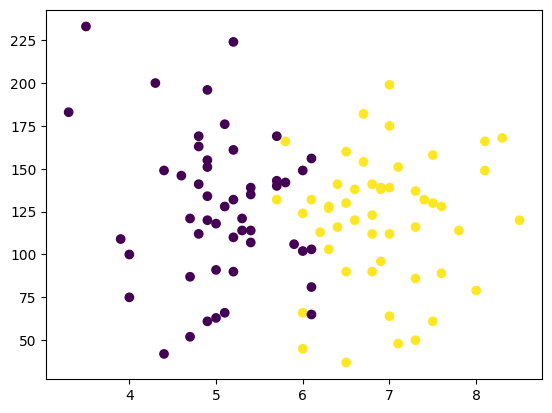

In [10]:
plt.scatter(placement_df['cgpa'], placement_df['iq'], c = placement_df['placement'])

Yellow indicating the placed students

<h3>2. Extracting input and output columns

here cgpa and iq are independent variables

In [13]:
x = placement_df.iloc[:, 0:2]  #only cgpa and iq coloumn
y = placement_df.iloc[:, -1]  #only placement column

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

<h3>4. Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.1)  # 0.1 i,e. 10% of the data is kept for the test model 

In [19]:
X_train

,cgpa,iq
43,6.8,141.0
29,7.0,112.0
39,4.6,146.0
99,6.2,113.0
25,5.0,91.0
...,...,...
5,7.1,48.0
27,6.0,124.0
81,5.4,107.0
76,4.9,155.0


In [20]:
X_test

,cgpa,iq
87,5.7,132.0
96,4.4,42.0
32,7.0,139.0
67,5.0,118.0
68,4.0,75.0
31,3.9,109.0
97,6.7,182.0
0,6.8,123.0
46,5.3,114.0
38,6.5,160.0


In [21]:
y_train

43    1
29    1
39    0
99    1
25    0
     ..
5     1
27    1
81    0
76    0
7     0
Name: placement, Length: 90, dtype: int64

In [22]:
y_test

87    1
96    0
32    1
67    0
68    0
31    0
97    1
0     1
46    0
38    1
Name: placement, dtype: int64

<h1>scaling

Scaling is understand and transform the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)   # will understand the data and transform 

In [26]:
X_train

array([[ 6.72126396e-01,  4.24567823e-01],
       [ 8.49520459e-01, -3.01593395e-01],
       [-1.27920830e+00,  5.49768033e-01],
       [ 1.39944206e-01, -2.76553353e-01],
       [-9.24420175e-01, -8.27434276e-01],
       [ 1.38170265e+00, -8.77514360e-01],
       [ 5.12471739e-02, -1.47847537e+00],
       [-3.03540953e-01,  3.99527781e-01],
       [-2.25487565e+00,  2.72825169e+00],
       [-1.26146890e-01, -4.51833646e-01],
       [ 1.29300562e+00,  1.49127361e-01],
       [ 2.28641237e-01,  7.40072352e-02],
       [-1.10181424e+00,  1.12568900e+00],
       [-1.01311721e+00, -1.01273059e-01],
       [ 7.60823427e-01, -7.02234066e-01],
       [-3.74498578e-02, -5.51993814e-01],
       [-1.19051127e+00, -9.27594444e-01],
       [ 4.94732332e-01,  3.49447697e-01],
       [ 4.94732332e-01, -1.01273059e-01],
       [-5.69632048e-01, -2.51513311e-01],
       [ 6.72126396e-01, -3.01593395e-01],
       [ 4.06035301e-01,  1.49127361e-01],
       [ 4.06035301e-01, -8.52474318e-01],
       [ 1.

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[-0.30354095,  0.19920745],
       [-1.45660236, -2.05439633],
       [ 0.84952046,  0.37448774],
       [-0.92442017, -0.15135314],
       [-1.81139049, -1.22807495],
       [-1.90008752, -0.37671352],
       [ 0.58342936,  1.45120954],
       [ 0.6721264 , -0.02615293],
       [-0.65832908, -0.25151331],
       [ 0.4060353 ,  0.90032862]])

<h3>5. Train the model 

Using Classified (Logistic Regression)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
#Model Training 
# fit is used to train the model
clf.fit(X_train, y_train)

LogisticRegression()

<h3>6. Evalute the Model

Evalute is basically finding the accuray of the test data

In [34]:
y_pred = clf.predict(X_test)

In [33]:
y_test

87    1
96    0
32    1
67    0
68    0
31    0
97    1
0     1
46    0
38    1
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.9

<h2>Decision Boundary

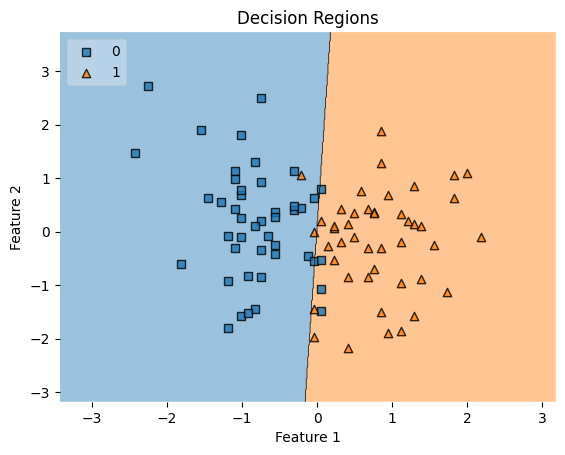

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
b
# Plot decision regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')

# Show the plot
plt.show()


Pickle convert all the object into files , and can be used in different environments

In [41]:
import pickle

In [43]:
pickle.dump(clf, open('model.pkl', 'wb'))